# Keeping your finger on the pulse: an at-home predictive model of heart disease

## Introduction

Heart disease, the buildup of plaque in the heart’s arteries, is the 2nd leading cause of death in Canada, with 53,704 deaths per year and 1 in 12 Canadians aged 20+ living with a diagnosed heart disease. </br>
</br>
Previous research indicates there are a variety of risk factors that may increase an individual’s likelihood of developing heart disease. Being of the male sex, older age, high cholesterol, high blood sugar levels, and high resting and post-exercise heart rate, are all associated with higher rates of heart disease.

<font size="2">Source: https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1</font>

In this project, we hope to answer the question: what is the correlation between given values of certain known heart disease risk factors and a positive diagnosis of heart disease?

To better understand the correlation between various risk factors and incidence of diagnosed heart disease, we plan to analyze anonymized patient data from the UC Irvine Machine Learning Repository, aggregated from 4 locations (Cleveland, Hungary, Switzerland, and the VA Long Beach) in 1988. The dataset contains 303 observations and the following variables: age, sex, chest pain, resting blood pressure, serum cholesterol, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, ST depression induced by exercise relative to rest, and diagnosis of heart disease (in which 0 represents no heart disease, and 1, 2, 3, 4 each represent increasing severity of heart disease).
</br>
</br>
These data will be wrangled and used to train a KNN-classification model to predict if a certain risk factor value is correlated with a positive heart disease diagnosis. 
</br>
</br>
With a test like this model that can be done at home, people may be more likely to take note of their health and seek care from a specialist who can confirm a heart disease diagnosis. 


## Preliminary Exploratory Data Analysis

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn import set_config
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import altair as alt; alt.__version__

'4.2.2'

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

### Reading Data From Web

In [4]:
heart_df = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")

In [5]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


### Data Summary

In [6]:
columns = heart_df.columns.to_list()
columns

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

| Variable |Description|
| --- | --- |
| age | Age of Patient |
| sex | Sex of Patient |
| cp | Chest Pain Type  ,1: typical angina ,2: atypical angina ,3: non-anginal pain ,4: asymptomatic |
| trestbps | Resting Blood Pressure (in mm Hg on admission to the hospital) |
| chol | Serum Cholestoral in mg/dl |
| fbs | (Fasting Blood Sugar > 120 mg/dl)  (1 = true; 0 = false) |
| restecg | Resting Electrocardiographic Results 0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy |
| thalach | Maximum Heart Rate Achieved |
| exang | Exercise Induced Angina|
| oldpeak | ST Depression Induced by Exercise Relative to Rest |
| slope | Slope of The Peak Exercise ST Segment ,1: upsloping, 2: flat, 3: downsloping|
| thal | 3 = normal; 6 = fixed defect; 7 = reversable defect |
|ca|number of major vessels (0-3) colored by flourosopy|
| num | Diagnosis of Heart Disease |

We are only interested in training data in the Preliminary Exploratory Data Analysis, so we will split that data from here:

In [7]:
heart_train, heart_test =train_test_split(
    heart_df,
    test_size= 0.25,
    random_state=2000,
)

X_train = heart_train.iloc[:,:-1]
y_train = heart_train["num"]

X_test = heart_train.iloc[:,:-1]
y_test = heart_test["num"]

In [8]:
heart_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
133,51,1,4,140,261,0,2,186,1,0.0,1,0.0,3.0,0
269,42,1,3,130,180,0,0,150,0,0.0,1,0.0,3.0,0
137,62,1,2,120,281,0,2,103,0,1.4,2,1.0,7.0,3
202,57,1,3,150,126,1,0,173,0,0.2,1,1.0,7.0,0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,43,1,3,130,315,0,0,162,0,1.9,1,1.0,3.0,0
284,61,1,4,148,203,0,0,161,0,0.0,1,1.0,7.0,2
123,55,1,4,140,217,0,0,111,1,5.6,3,0.0,7.0,3
54,60,1,4,130,253,0,0,144,1,1.4,1,1.0,7.0,1


In [9]:
def details (df):
    table_d = pd.DataFrame(df.dtypes, columns=["data_type"])
    table_d['#missing'] = df.isnull().sum().values
    table_d['%missing'] = df.isnull().sum().values / len(df)
    table_d['#unique'] = df.nunique().values
    return table_d

Finding count, mean, std, min, 25%, 50%, 75% and max of each ID, results rounded to 2 decimal points.

In [10]:
round(heart_train.describe(),2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,224.00,225.00,227.00
mean,54.67,0.65,3.15,133.08,249.02,0.17,0.99,149.70,0.33,1.07,1.60,0.66,4.78,0.94
std,8.98,0.48,0.96,17.63,54.24,0.37,1.00,22.84,0.47,1.18,0.62,0.93,1.96,1.21
min,34.00,0.00,1.00,100.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.50,0.00,0.00,136.50,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,243.00,0.00,1.00,154.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,282.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,195.00,1.00,6.20,3.00,3.00,7.00,4.00


Checking for count of missing data, % of missing data, and count of unique data.

In [11]:
details(heart_train)

,data_type,#missing,%missing,#unique
age,int64,0,0.000000,40
sex,int64,0,0.000000,2
cp,int64,0,0.000000,4
trestbps,int64,0,0.000000,45
chol,int64,0,0.000000,138
fbs,int64,0,0.000000,2
restecg,int64,0,0.000000,3
thalach,int64,0,0.000000,80
exang,int64,0,0.000000,2
oldpeak,float64,0,0.000000,36


### Data Visualization

We are interested in how the number of patient would look like in different variables, so we plotted count vs columns variables accordingly in the following:

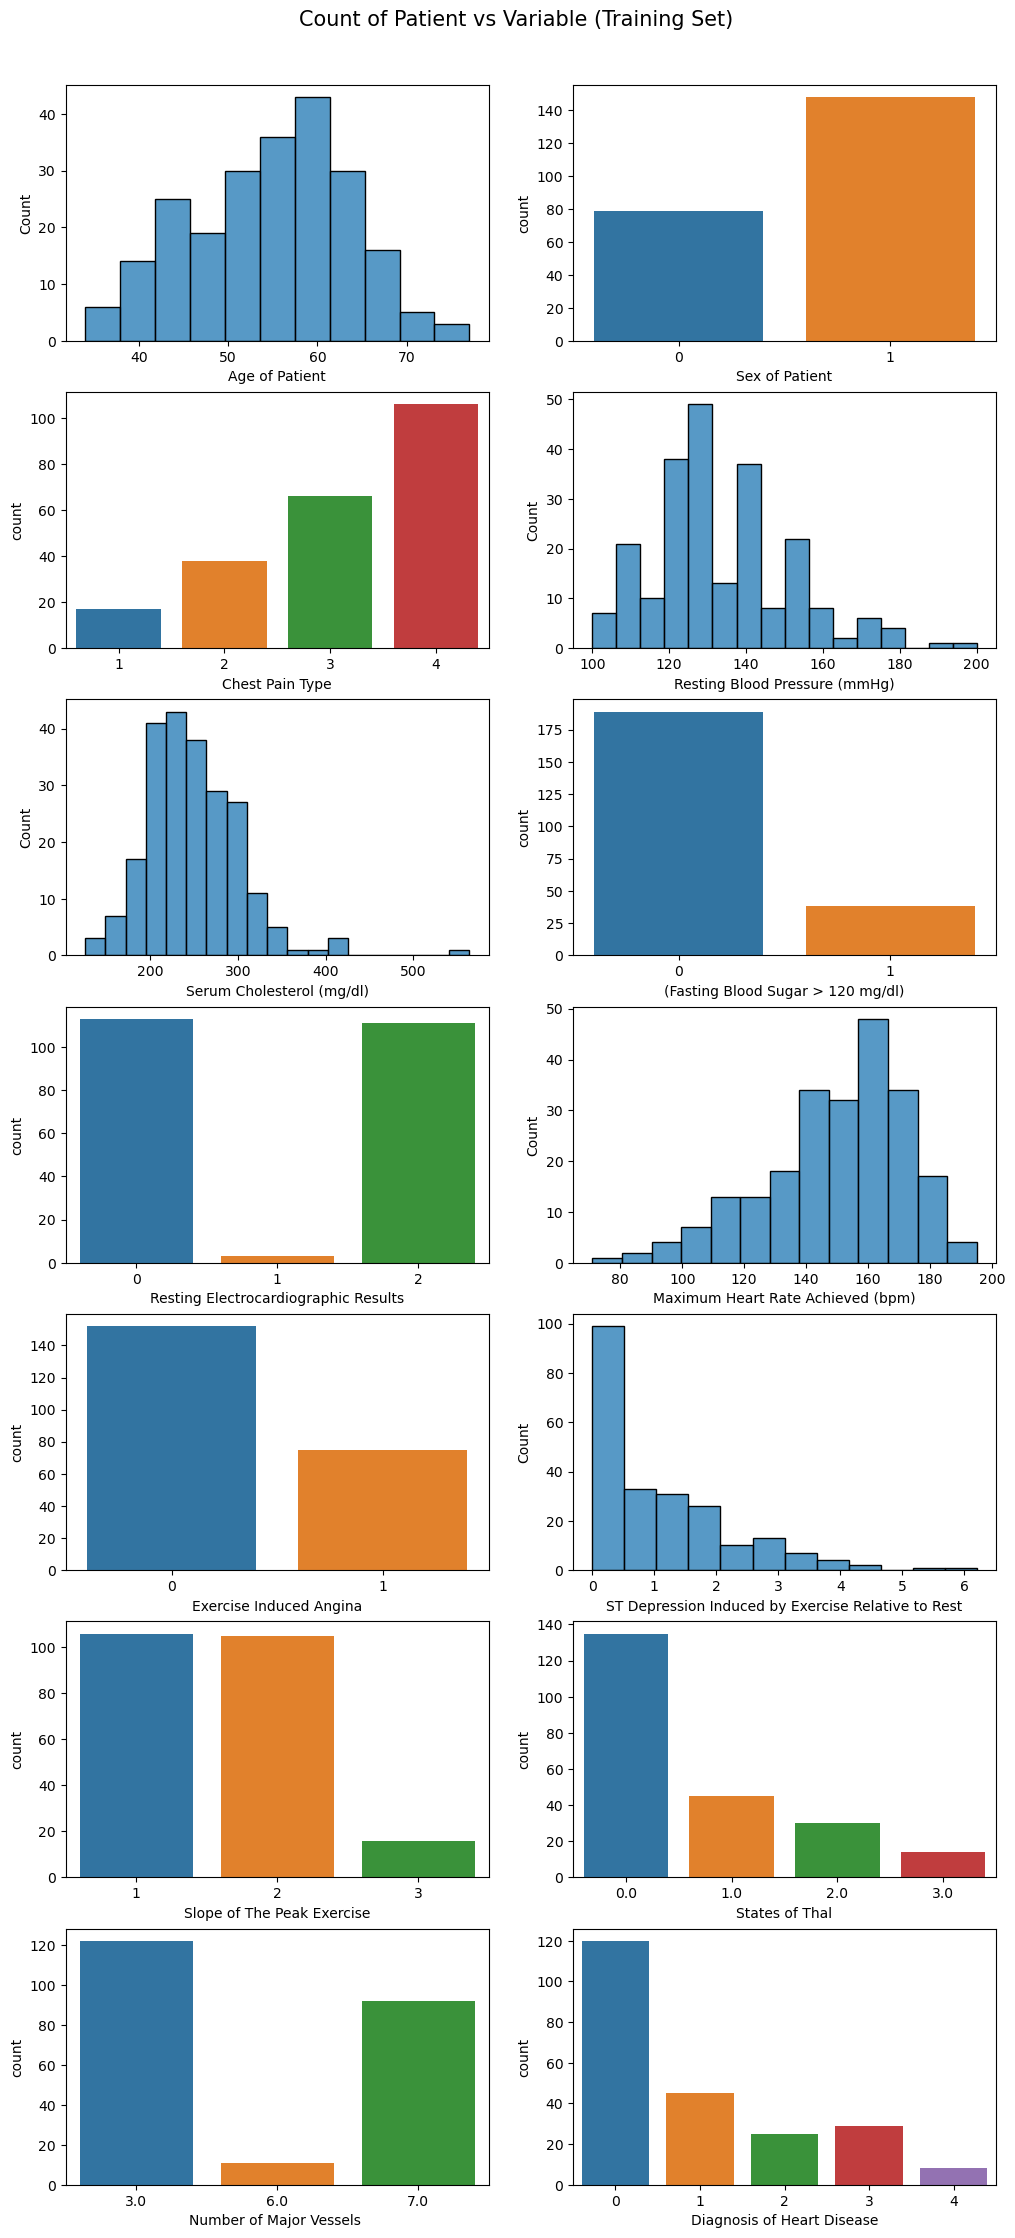

In [12]:
columns= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
fig, ax = plt.subplots(7, 2, figsize=(12, 25))
ax = ax.flatten()
fig.subplots_adjust(top=0.95)
fig.suptitle("Count of Patient vs Variable (Training Set)",fontsize = 15)

new_labels = ['Age of Patient', 'Sex of Patient', 'Chest Pain Type', 'Resting Blood Pressure (mmHg)', 'Serum Cholesterol (mg/dl)', '(Fasting Blood Sugar > 120 mg/dl)', 'Resting Electrocardiographic Results', 'Maximum Heart Rate Achieved (bpm)', 'Exercise Induced Angina', 'ST Depression Induced by Exercise Relative to Rest', 'Slope of The Peak Exercise', 'States of Thal', 'Number of Major Vessels ', 'Diagnosis of Heart Disease']

for i, f in enumerate(columns):
    if heart_train[f].nunique() > 10:
        sns.histplot(heart_train, ax=ax[i], x=f)
    else:
        sns.countplot(data=heart_train, ax=ax[i], x=f)
    ax[i].set_xlabel(new_labels[i])

## Methods

This project aims to achieve the followings:
- evaluate classification accuracy using a test data set and appropriate metrics
- execute cross-validation in Python to choose the number of neighbours.
- using the scikit-learn package to predict the class of a test dataset
- finding multiple scatterplots to capture a reasonable representation of the predicted data 


In this project, we are interested in variables that are easily accessible to people at home. Therefore, in our dataset, we would only keep data that could be easily obtained without need for professional medical equipment or testing. We will drop: Number of Major Vessels, Resting Electrocardiographic Results, Slope of The Peak Exercise ST Segment, thal, and ST Depression Induced by Exercise Relative to Rest. The dropped data includes incomplete data, and the remaining data which we are interested in are clean, meaning each variable forms a column, each observation forms a row and each cell is a single measurement. Therefore, no further wrangling is required. 
</br>
</br>
Then, we will create a grid search model with the KNeighborsClassifier and a parameter grid, fit the grid search model to the training set, and get the cv_results_ from the fitted model as a dataframe. We will then plot the accuracy (y-axis) vs the K value (x-axis) to find the best K value for our project. After that, using the best K value we obtained, we want to train the classifier with the training data set using the make_pipeline and fit function. Then, we will predict with the test data set and look at the accuracy as well as the confusion matrix to see how well our model performed. Lastly, we will plot multiple scatterplots to reasonably capture our predicted data. 

## Expected outcomes and significance

By the end of the project, we should have predictions from the test data, and have according matrix and results to see how well our model perform, and hopefully our predictions could give some insight or reveal trends that we could plot in the following format. It is likely the model would not be the most accurate but we should be able to at least identify patients which have certain qualities would have a higher chance of getting heart disease and therefore is recommended to go get regular body check-ups.

In [13]:
expected_plot =alt.Chart(heart_train).mark_point().encode(
    x=alt.X("age",title = "Age (years)", scale=alt.Scale(zero=False)),
    y=alt.Y("chol",title = "Serum Cholesterol (mg/dl)", scale=alt.Scale(zero=False)),
    color=alt.Color("num:N",title = "Diagnosis of Heart Disease")
).properties(title="Serum Cholesterol vs Age (expected plot)")

expected_plot

alt.Chart(...)

## Results

In [14]:
heart_preprocessor = make_column_transformer(
    (StandardScaler(), ["age", "trestbps","chol","thalach"]),
)

knn = KNeighborsClassifier() 

X_train = heart_train[["age", "trestbps","chol","thalach"]]
y_train = heart_train["num"]

heart_tune_pipe = make_pipeline(heart_preprocessor, knn)
param_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 25, 1),
}

heart_tune_grid = GridSearchCV(
    estimator=heart_tune_pipe,
    param_grid=param_grid,
    cv=5
)

accuracies_grid = pd.DataFrame(
    heart_tune_grid.fit(
        X_train,     ##why is there an error here
        y_train
    ).cv_results_
)

accuracies_grid2 = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 10**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)
accuracies_grid2

,n_neighbors,mean_test_score,sem_test_score
0,1,0.383575,0.016984
1,2,0.471787,0.014210
2,3,0.497874,0.006013
3,4,0.471691,0.015982
4,5,0.497971,0.006757
5,6,0.497971,0.012813
6,7,0.497971,0.010243
7,8,0.511208,0.010068
8,9,0.515749,0.011787
9,10,0.515556,0.011740


In [15]:


cross_val_plot=alt.Chart(accuracies_grid2).mark_line(point=True).encode(
    x=alt.X("n_neighbors",title = "K value", scale=alt.Scale(zero=False)),
    y=alt.Y("mean_test_score",title = "Accuracy", scale=alt.Scale(zero=False))
)
cross_val_plot

alt.Chart(...)

In [16]:
knn_spec = KNeighborsClassifier(n_neighbors=17)

heart_fit = make_pipeline(heart_preprocessor, knn_spec).fit(X_train, y_train)

heart_test_predictions = heart_test.assign(
    predicted=heart_fit.predict(heart_test[["age", "trestbps","chol","thalach"]])
)
heart_test_predictions

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,predicted
73,65,1,4,110,248,0,2,158,0,0.6,1,2.0,6.0,1,0
222,39,0,3,94,199,0,0,179,0,0.0,1,0.0,3.0,0,0
32,64,1,3,140,335,0,0,158,0,0.0,1,0.0,3.0,1,0
95,52,1,4,128,255,0,0,161,1,0.0,1,1.0,7.0,1,0
157,58,1,4,125,300,0,2,171,0,0.0,1,2.0,7.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,51,0,3,130,256,0,2,149,0,0.5,1,0.0,3.0,0,0
215,56,1,1,120,193,0,2,162,0,1.9,2,0.0,7.0,0,0
169,45,0,2,112,160,0,0,138,0,0.0,2,0.0,3.0,0,0
115,41,1,2,135,203,0,0,132,0,0.0,2,0.0,6.0,0,0


In [17]:
X_test = heart_test[["age", "trestbps","chol","thalach"]]
y_test = heart_test["num"]
heart_prediction_accuracy = heart_fit.score(X_test, y_test)
heart_prediction_accuracy # this is the accuracy of our predictor when predicting test data after being trained with training data

0.5394736842105263

In [18]:
heart_matrix = pd.crosstab(
    heart_test_predictions["num"],  # True labels
    heart_test_predictions["predicted"],  # Predicted labels
)

heart_matrix

predicted,0,1,3
num,,,
0,40,2,2
1,10,0,0
2,6,5,0
3,5,0,1
4,5,0,0


In [19]:
plot1=alt.Chart(heart_test_predictions).mark_point().encode(
    x=alt.X("age",title = "Age (years)", scale=alt.Scale(zero=False)),
    y=alt.Y("chol",title = "Serum Cholesterol (mg/dl)", scale=alt.Scale(zero=False)),
    color=alt.Color("predicted:N",title = "Diagnosis of Heart Disease")
).properties(title="Serum Cholesterol vs Age")
plot1

alt.Chart(...)

There are no clear trends in serum cholesterol and Age that can be seen through the plot above. However, if a patient falls within the range of ages 50 to 65 and have a serum cholesterol level of around 200 to 300, they should be aware that they have a higher risk of possessing heart disease. 

In [20]:
plot3=alt.Chart(heart_test_predictions).mark_point().encode(
    x=alt.X("age",title = "Age (years)", scale=alt.Scale(zero=False)),
    y=alt.Y("trestbps",title = "Resting Blood Pressure (in mm Hg on admission to the hospital)", scale=alt.Scale(zero=False)),
    color=alt.Color("predicted:N",title = "Diagnosis of Heart Disease")
).properties(title="Resting Blood Pressure vs Age")
plot3

alt.Chart(...)

There are no clear trends in Resting Blood Pressure and Age that can be seen through the plot above. However, if a patient falls within the range of ages 50 to 65 and have a Resting blood pressure of around 130, they should be aware that they have a higher risk of possessing heart disease. 

In [21]:
plot3=alt.Chart(heart_test_predictions).mark_point().encode(
    x=alt.X("age",title = "Age (years)", scale=alt.Scale(zero=False)),
    y=alt.Y("thalach",title = "Maximum Heart Rate Achieved (bpm)", scale=alt.Scale(zero=False)),
    color=alt.Color("predicted:N",title = "Diagnosis of Heart Disease")
).properties(title="Maximum Heart Rate Achieved vs Age")
plot3

alt.Chart(...)

There are no clear trends in Maximum Heart Rate Achieved and Age that can be seen through the plot above. However, if a patient falls within the range of ages 50 to 65 and a Maximum heart rate of 100 to 160, they should be aware that they have a higher risk of possessing heart disease. As discussed in previous analyses, patients of ages 50 to 55 seem to have higher risk of heart disease. 

In [22]:
plot4=alt.Chart(heart_test_predictions).mark_point().encode(
    x=alt.X("trestbps",title = "Resting Blood Pressure (in mm Hg on admission to the hospital)", scale=alt.Scale(zero=False)),
    y=alt.Y("chol",title = "Serum Cholesterol (mg/dl)", scale=alt.Scale(zero=False)),
    color=alt.Color("predicted:N",title = "Diagnosis of Heart Disease")
).properties(title="Serum Cholesterol vs Resting Blood Pressure")
plot4

alt.Chart(...)

There are no clear trends in serum cholesterol and Resting Blood Pressure that can be seen through the plot above. However, if a patient has a resting blood pressure of around 110 to 140 mm Hg and a serum cholesterol level of 200 to 300, they should be aware that they have a higher risk of possessing heart disease. 

In [23]:
plot5=alt.Chart(heart_test_predictions).mark_point().encode(
    x=alt.X("trestbps",title = "Resting Blood Pressure (in mmHg upon admission to hospital)", scale=alt.Scale(zero=False)),
    y=alt.Y("thalach",title = "Maximum Heart Rate Achieved (bpm)", scale=alt.Scale(zero=False)),
    color=alt.Color("predicted:N",title = "Diagnosis of Heart Disease")
).properties(title="Maximum Heart Rate Achieved vs Resting Blood Pressure")
plot5

alt.Chart(...)

There are no clear trends in Maximum Heart rate Achieved and Resting Blood Pressure that can be seen through the plot above. However, if a patient has a resting blood pressure of around 110 to 140 mm Hg and a maximum heart rate of 100 to 160, they should be aware that they have a higher risk of having heart disease. 

In [24]:
plot6=alt.Chart(heart_test_predictions).mark_point().encode(
    x=alt.X("chol",title = "Serum Cholesterol (mg/dl)", scale=alt.Scale(zero=False)),
    y=alt.Y("thalach",title = "Maximum Heart Rate Achieved (bpm)", scale=alt.Scale(zero=False)),
    color=alt.Color("predicted:N",title = "Diagnosis of Heart Disease")
).properties(title="Maximum Heart Rate Achieved vs Serum Cholesterol")
plot6

alt.Chart(...)

There are no clear trends in Maximum Heart rate Achieved and Serum cholesterol that can be seen in the plot above. However, if a patient has a resting blood pressure of around 110 to 140 mm Hg and a Serum cholesterol level of around 200 to 300, they should be aware that they have a higher risk of possessing heart disease. 

## Discussion

#### Summarization

As described in the Methods section, to find the most accurate K value for our model, we performed a number of operations: we created a grid search model with the KNeighborsClassifier and a parameter grid. Then we fit the grid search model to the training set. Plotting the Accuracy on (y-axis) and K value (x-axis) shows how the accuracy generally increased for larger K values. Eventually, the highest accuracy of 54% was achieved for K value=17.
</br>
</br>
Then, we used that value and the training set to make a classifier. The accuracy we got after using the classifier on a testing set, was about 54%. The confusion matrix showed that the precision (number of accurate positive predictions/ number of all positive predictions) and recall (number of accurate positive predictions/number of positive observations) were low. Our model had higher accuracy in making negative predictions. 
However, plotting various scatterplots gave us some more insights about the model and the data. 
</br>
</br>
The plots show important trends; for example, patients in these groups have higher risk of heart disease:
- Age 50 to 65 and Blood Pressure around 130 
- Age 50 to 65 and Blood Pressure around 130 and Maximum Heart Rate 100 to 160
- Resting Blood Pressure of around 110 to 140 mm Hg and a Maximum Heart Rate of 100 to 160
- Blood Pressure of around 110 to 140 mm Hg and a Serum Cholesterol level of around 200 to 300
</br>
</br>

In summary, our model had quite a low accuracy. Initially, we hoped to make positive, accurate predictions more often and accurately predict the disease's level. The low accuracy rate of our model may be due to a variety of factors, including confounding health variables that may be impacting results, and the fact that analyzing. However, it is essential to highlight that we managed to distinguish certain groups of people who share specific characteristics and are more likely to have heart disease in the future. These findings may be a key to saving lives, building further models, and starting new research related to the predictors we used. 



#### Difference from Expected Results

Based on previous research, we expected male patients of older age, high cholesterol, high blood sugar levels, high resting and post-exercise heart rate, to have higher rates of heart disease. We also expected that our model can have a low accuracy, since it is difficult to diagnose heart disease based on such limited predictors. As expected, we were able to identify groups of people who are at higher risk of the disease yet not able to certainly predict the heart attack.


#### Impact

This will allow patients to be more aware of the risk of heart attack. Though this model should not replace the opinion of a primary care specialist, it may function to help people seek help sooner.
</br>
</br>
Additionally, this model can be used to examine trends in patient data and types of heart disease. Since certain variables are correlated with heart disease, further studies may be done to test this connection. 


#### Future Questions

- How can we keep advancing this model to diagnose heart disease earlier, more accurately, and in an unbiased manner?
- Which variables have the most significant impact on heart disease?
- Are we able to make a model that is much more accurate in predicting the disease?
- How can we suggest potential lifestyle changes to patients in an unbiased manner?


## References

Canada, Public Health Agency of. “Government of Canada.” Canada.ca, July 28, 2022. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html. 

Government of Canada, Statistics Canada. “Heart and Stroke Month.” Statistics Canada, February 10, 2022. https://www.statcan.gc.ca/o1/en/plus/353-heart-and-stroke-month. 

Government of Canada, Statistics Canada. “Heart and Stroke Month.” Statistics Canada, February 10, 2022. https://www.statcan.gc.ca/o1/en/plus/353-heart-and-stroke-month. 

“Heart Disease.” UCI Machine Learning Repository. Accessed December 9, 2023. https://archive.ics.uci.edu/dataset/45/heart+disease. 